# Code to calculate the average crime reporting rate in various catogories using the CSEW and the aggreated police reports.

In [1]:
from itertools import cycle

from fuzzywuzzy import process
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_dir = "/Users/pgrylls/University of Southampton/AI-CJS - Documents/data/"

/Users/pgrylls/anaconda3/envs/AI-CJS/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Load reports

In [2]:
rows_to_skip = [0, 1, 2, 3, 5, 7, 12, 14, 21, 23, 45, 47, 61, 63, 68, 70, 72, 73, 74, 75, 76, 77, 88, 90, 116, 118, 120, 123, 125, 141, 142, 143, 144, 145, 146, 156, 158, 163, 165, 166, 167, 169, 171, 173, 175, 177, 186, 188, 190, 194, 196, 206, 208, 210, 211, 212, 213, 214, 215, 217, 219, 221, 226, 228, 230, 238, 240, 249, 251, 288, 290, 292, 293, 294, 295, 296, 297, 299, 310, 312, 314, 316, 318, 320, 322, 323]

reported_crime = pd.read_excel(data_dir+"Appendix_1.xlsx", sheet_name='Table A4', 
              skiprows=rows_to_skip, index_col=[0,1,2], nrows=322,
             na_values=['..', '...'])

#### Use ONS data to get the population estimate for england and wales

In [3]:
population_estimates = pd.read_csv(data_dir+'population_estimates.csv')
population_estimates = population_estimates[((population_estimates['country'] == 'E') | (population_estimates['country'] == 'W'))]

years = population_estimates.iloc[:, 5:-2]

years_totals=years.sum()

### Load survey

In [4]:
rows_to_skip = [0,1,2,3,5,6,12,14,16,21,23,25,31,37,43,47,52,54,58,60,63, 73, 75]

surveyed_crime = pd.read_excel(data_dir+"Appendix_1.xlsx", sheet_name='Table A1', 
              skiprows=rows_to_skip, index_col=[0], nrows=71,
             na_values='..', usecols="A:AC")

## Get matching categories from CSEW and police reports

In [5]:
surveyed_crime_categories = [i for i in surveyed_crime.index]

In [6]:
reported_crime_categories = [i[2] for i in reported_crime.index]

In [7]:
simmilarity_matrix = [process.extract(i, reported_crime_categories) for i in surveyed_crime_categories]

##### First order matches: The first result is higher than the second

In [8]:
first_order_matches = []
for i, matches in enumerate(simmilarity_matrix):
    if matches[0][1] > matches[1][1]:
        first_order_matches.append((surveyed_crime_categories[i]+"\n MATCHED \n"+matches[0][0]+ "\n AT {}".format(matches[0][1]), i, reported_crime_categories.index(matches[0][0])))
    #print(surveyed_crime_categories[i], matches)
    #print("\n\n")
for i in first_order_matches:
    print(i)

('Violence with injury\n MATCHED \nViolence with injury\n AT 100', 1, 34)
('Assault with minor injury\n MATCHED \nAssault with injury 14 \n AT 88', 3, 31)
('Violence without injury\n MATCHED \nViolence without injury\n AT 100', 4, 48)
('THEFT OFFENCES8\n MATCHED \nAll other theft offences\n AT 87', 6, 139)
('Theft from the person\n MATCHED \nTheft from the person\n AT 100', 7, 126)
('Other theft of personal property \n MATCHED \nOther theft\n AT 90', 11, 137)
('Domestic burglary\n MATCHED \nDomestic burglary \n AT 100', 13, 107)
('Domestic burglary in a dwelling\n MATCHED \nBurglary in a dwelling\n AT 95', 18, 96)
('Theft from vehicles\n MATCHED \nTheft from a vehicle35\n AT 88', 32, 122)
('Bicycle theft\n MATCHED \nBicycle theft\n AT 100', 35, 128)
('CRIMINAL DAMAGE\n MATCHED \nCriminal damage\n AT 100', 36, 154)
('Criminal damage to a vehicle\n MATCHED \nCriminal damage to a vehicle\n AT 100', 37, 147)
('Arson and other criminal damage\n MATCHED \nOther criminal damage\n AT 95', 38, 

##### Higher order matches: Get results that are within 10 of the best match

In [9]:
higher_order_matches = []
for i, matches in enumerate(simmilarity_matrix):
    if matches[0][1] <= 87:
        pass
    higher_order_matches.append([])
    for j, match in enumerate(matches):
        if (matches[0][1] <= matches[j][1]+5) and (matches[j][1]>86):
            higher_order_matches[-1].append((matches[j][0]+ " AT {}".format(matches[j][1]), i, reported_crime_categories.index(matches[j][0])))
for i in higher_order_matches:
    for j in i:
        print(j)

('Violence with injury AT 90', 0, 34)
('Violence without injury AT 90', 0, 48)
('TOTAL VIOLENCE AGAINST THE PERSON AT 90', 0, 54)
('Violence with injury AT 100', 1, 34)
('More serious wounding or other act endangering life 11 AT 90', 2, 15)
('Wounding 11,12 AT 90', 2, 16)
('Other wounding 13 AT 90', 2, 26)
('Racially or religiously aggravated other wounding 13 AT 90', 2, 28)
('Assault with injury 14  AT 88', 3, 31)
('Violence without injury AT 100', 4, 48)
('Robbery of business property AT 90', 5, 93)
('Robbery of personal property AT 90', 5, 94)
('TOTAL ROBBERY  AT 90', 5, 95)
('All other theft offences AT 87', 6, 139)
('Theft from the person AT 100', 7, 126)
('Other theft AT 90', 11, 137)
('Domestic burglary  AT 100', 13, 107)
('Non-domestic burglary  AT 95', 13, 118)
('Burglary in a dwelling AT 95', 18, 96)
('Domestic burglary  AT 90', 18, 107)
('Burglary AT 90', 18, 120)
('Domestic burglary  AT 90', 23, 107)
('Burglary AT 90', 23, 120)
('Theft from a vehicle35 AT 88', 32, 122)
('Bi

In [10]:
reported_crime.loc[reported_crime.index[107]]

/Users/pgrylls/anaconda3/envs/AI-CJS/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,,,"Apr '02 to \n Mar '032,3",Apr '03 to \nMar '04,Apr '04 to \nMar '05,Apr '05 to \nMar '06,Apr '06 to \nMar '07,Apr '07 to\nMar '08,Apr '08 to \nMar '09,Apr '09 to \nMar '10,Apr '10 to \nMar '11,Apr '11 to \nMar '12,Apr '12 to \nMar '13,Apr '13 to \nMar '14,Apr '14 to \nMar '15,Apr '15 to\n Mar '16,Apr '16 to\n Mar '17,Apr '17 to\n Mar '18,Apr '18 to\n Mar '19,Oct '17 to\n Sep '18,Oct '18 to\n Sep '19,% change between years
Offence,,,,,,,,,,,,,,,,,,,,,,
Offence,29A,Domestic burglary,437583.0,402345.0,321507.0,300517.0,292260.0,280696.0,284431.0,268606.0,258165.0,245312.0,227276.0,211988.0,196554,194570.0,206045.0,…,5.0,3.0,2.0,-


In [11]:
reported_crime.loc[reported_crime.index[107]].iloc[0][:-5]

/Users/pgrylls/anaconda3/envs/AI-CJS/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Apr '02 to \n Mar '032,3    437583
Apr '03 to \nMar '04        402345
Apr '04 to \nMar '05        321507
Apr '05 to \nMar '06        300517
Apr '06 to \nMar '07        292260
Apr '07 to\nMar '08         280696
Apr '08 to \nMar '09        284431
Apr '09 to \nMar '10        268606
Apr '10 to \nMar '11        258165
Apr '11 to \nMar '12        245312
Apr '12 to \nMar '13        227276
Apr '13 to \nMar '14        211988
Apr '14 to \nMar '15        196554
Apr '15 to\n Mar '16        194570
Apr '16 to\n Mar '17        206045
Name: (Offence, 29A, Domestic burglary ), dtype: object

# Loop over the first order matches

/Users/pgrylls/anaconda3/envs/AI-CJS/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


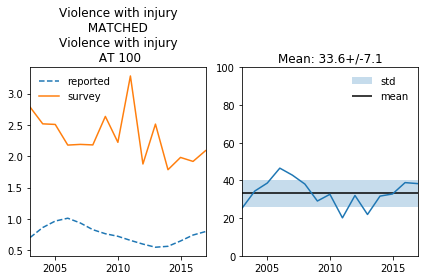

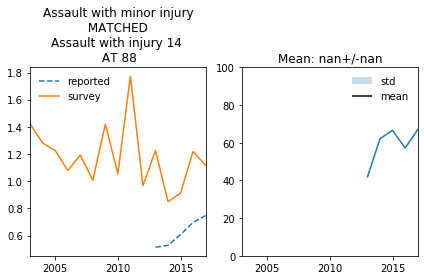

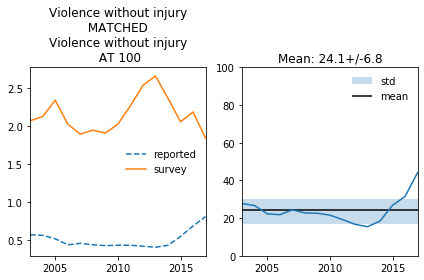

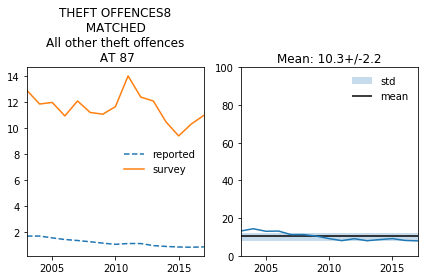

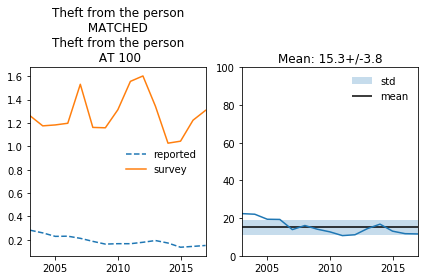

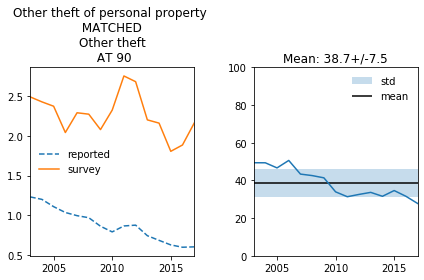

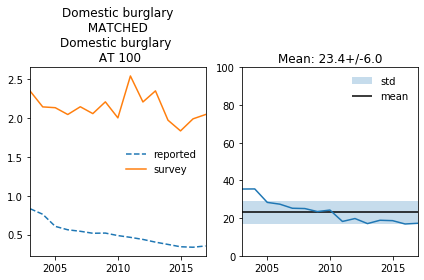

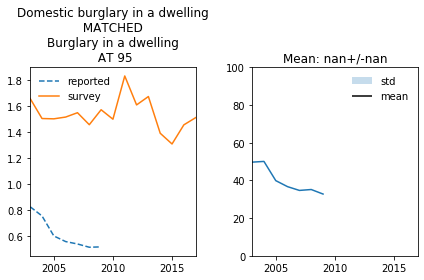

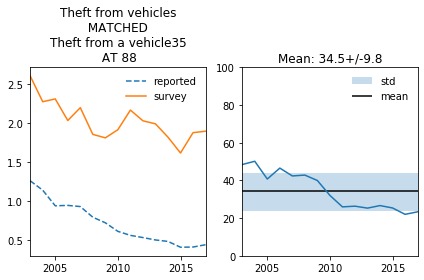

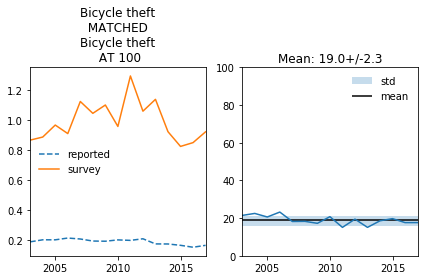

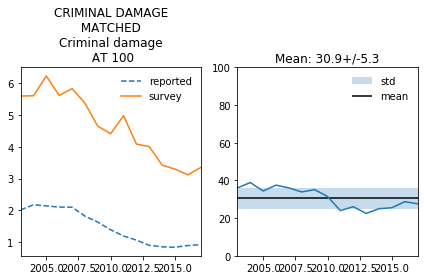

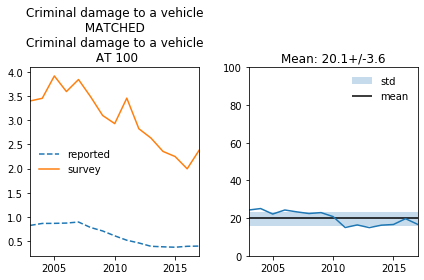

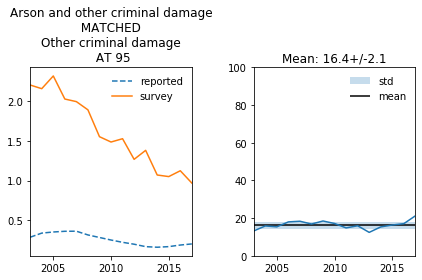

In [15]:
for match in first_order_matches:
    try:
        title = match[0]
        survey_frac_index = surveyed_crime.index[match[1]]
        reported_crime_index = reported_crime.index[match[2]]
        
        reported_frac = np.array(reported_crime.loc[reported_crime_index].iloc[0])[:-5] / \
                        np.array(years_totals[1:])

        survey_frac = np.array(surveyed_crime.loc[survey_frac_index]) / \
                      np.array(surveyed_crime.loc['Unweighted base - number of adults'].iloc[0])
        
        years = np.arange(2003, 2018)
        report_percentage = (reported_frac/survey_frac[-17:-2])*100
        ava_report = np.mean(report_percentage)
        std_report = np.std(report_percentage)        
        
        fig, axs = plt.subplots(1,2)

        axs[0].plot(years, reported_frac*100, "--", label='reported')
        axs[0].plot(years, survey_frac[-17:-2]*100, label='survey')
        axs[0].set_xlim(2003, 2017)
        axs[0].legend(frameon=False)
        axs[0].set_title(title)

        axs[1].plot(years, report_percentage)
        axs[1].fill_between(years, 
                            np.full_like(years, ava_report+std_report), 
                            np.full_like(years, ava_report-std_report), 
                            alpha = 0.25, label = "std")
        axs[1].hlines(ava_report, 2003, 2017, 'k', label = "mean")
        axs[1].set_ylim(0,100)
        axs[1].set_xlim(2003, 2017)
        axs[1].set_title("Mean: "+str(round(ava_report, 1))+"+/-"+str(round(std_report, 1)))
        axs[1].legend(frameon=False)
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(match[0], "faild with exception:\n")
        print(e)

## Loop over the higher order matches

/Users/pgrylls/anaconda3/envs/AI-CJS/lib/python3.7/site-packages/ipykernel_launcher.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.


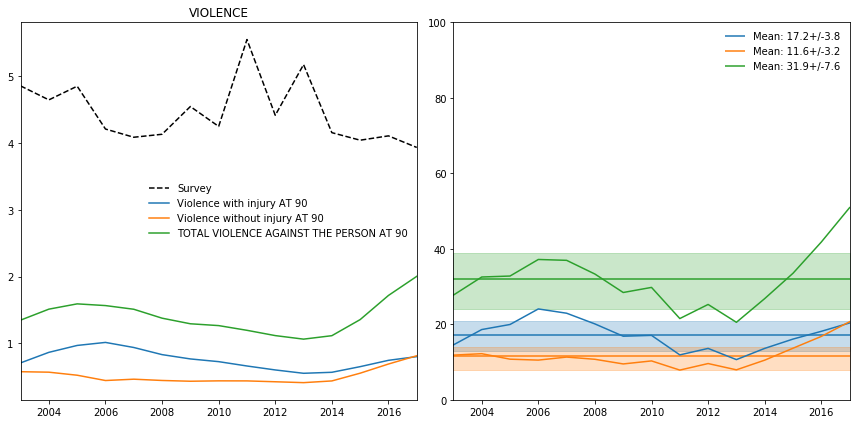

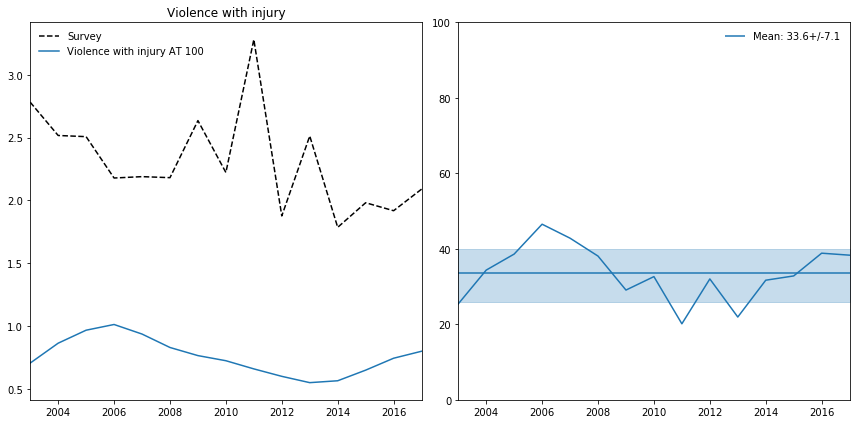

No handles with labels found to put in legend.


More serious wounding or other act endangering life 11 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

Wounding 11,12 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

Other wounding 13 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

Racially or religiously aggravated other wounding 13 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2



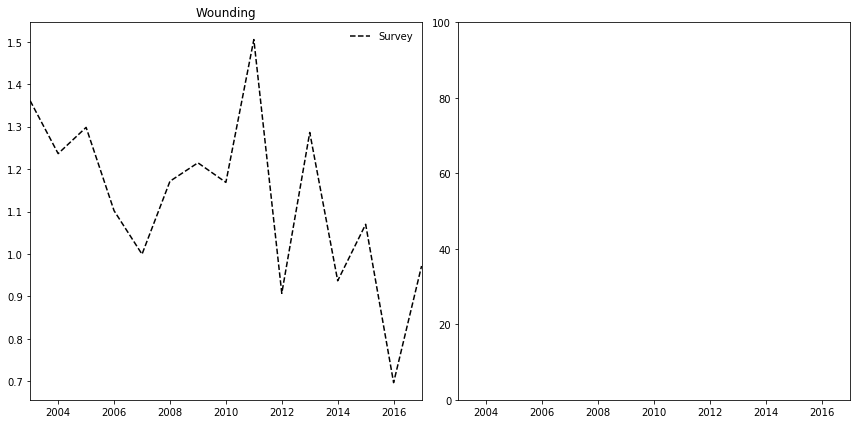

No handles with labels found to put in legend.


Assault with injury 14  AT 88 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2



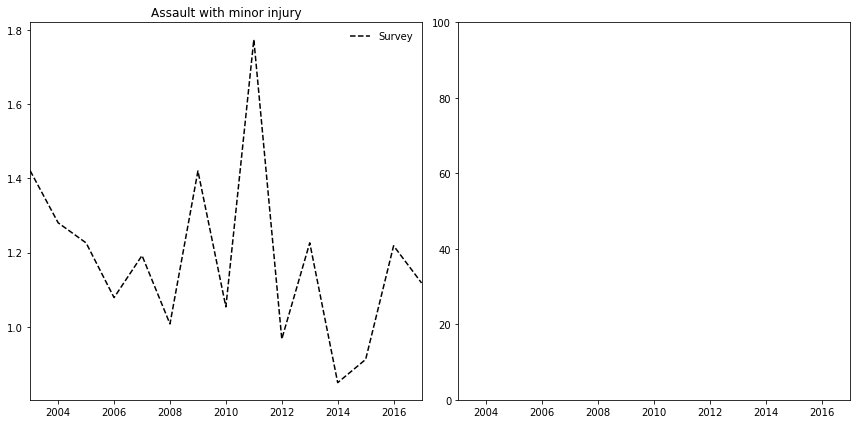

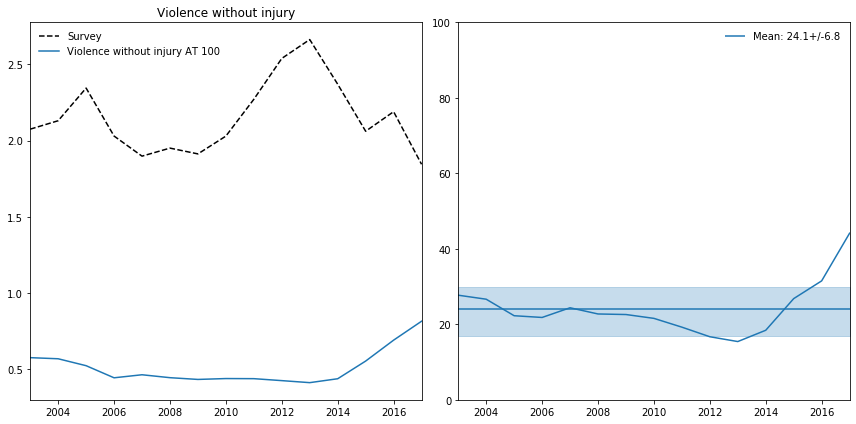

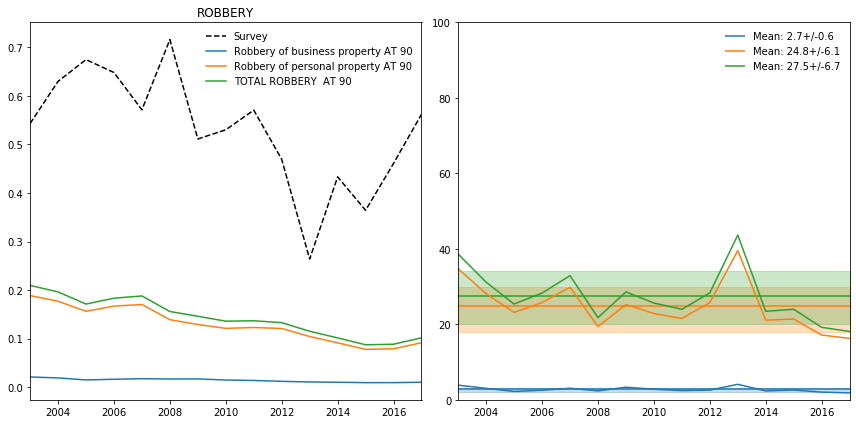

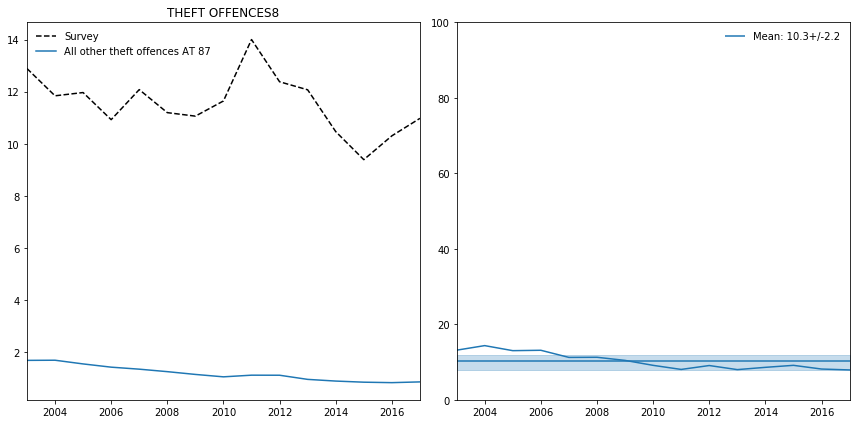

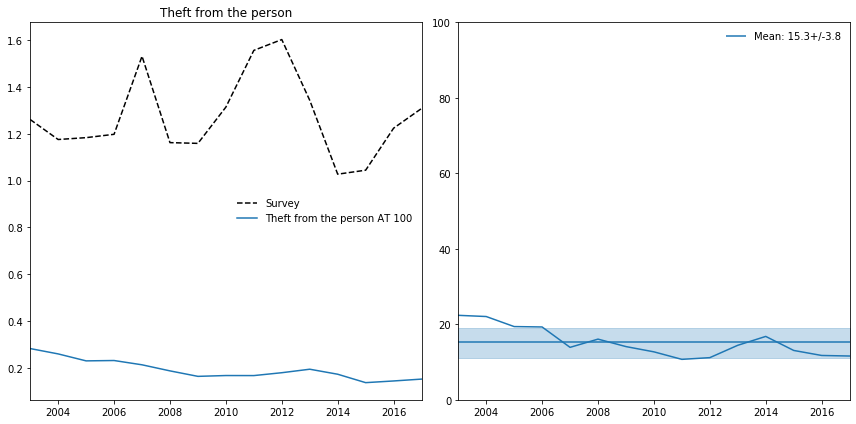

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey



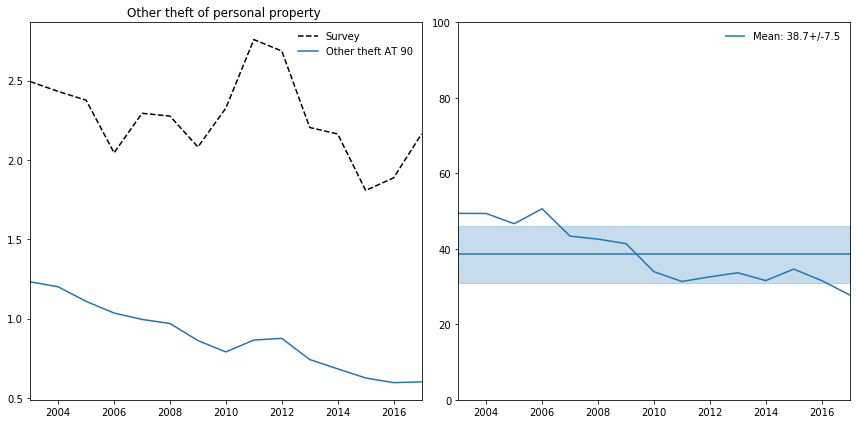

list index out of range
Multiple matches in survey



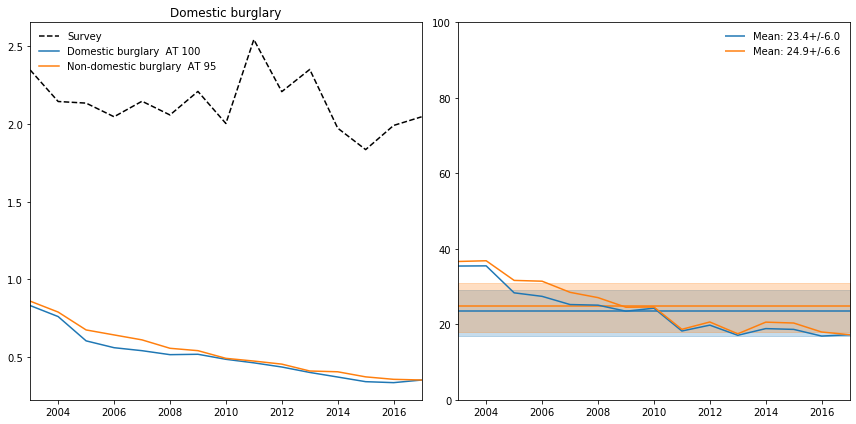

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

Burglary in a dwelling AT 95 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2



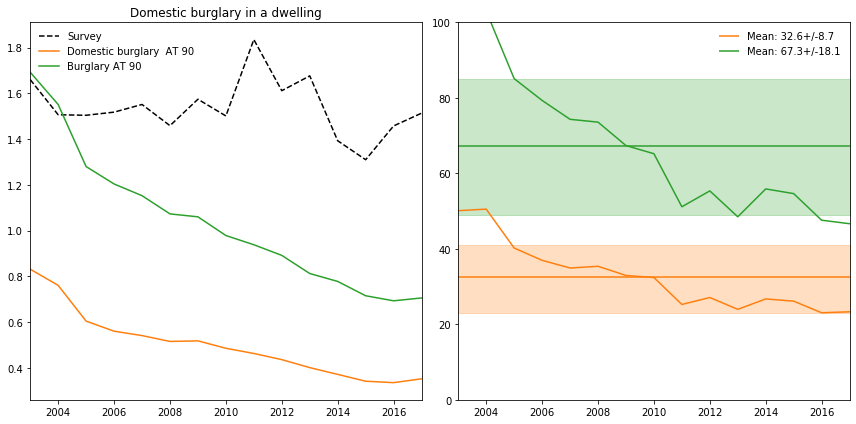

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey



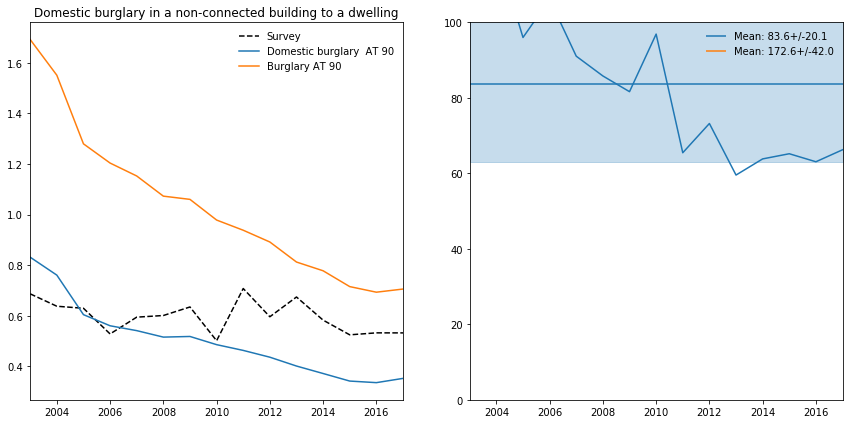

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey



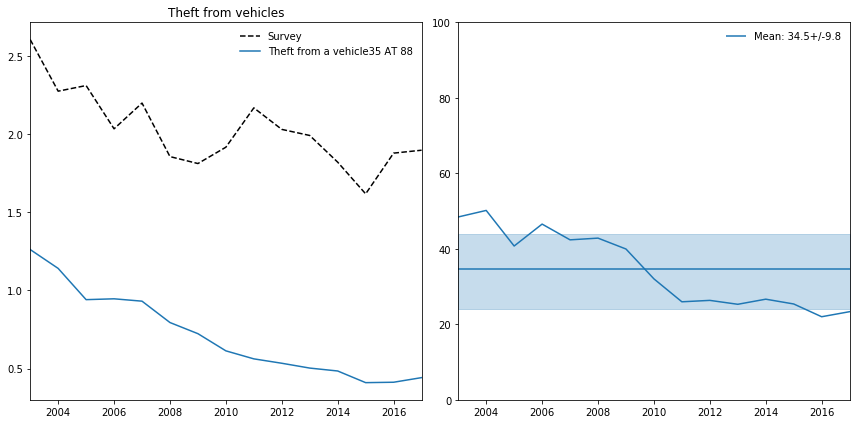

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey



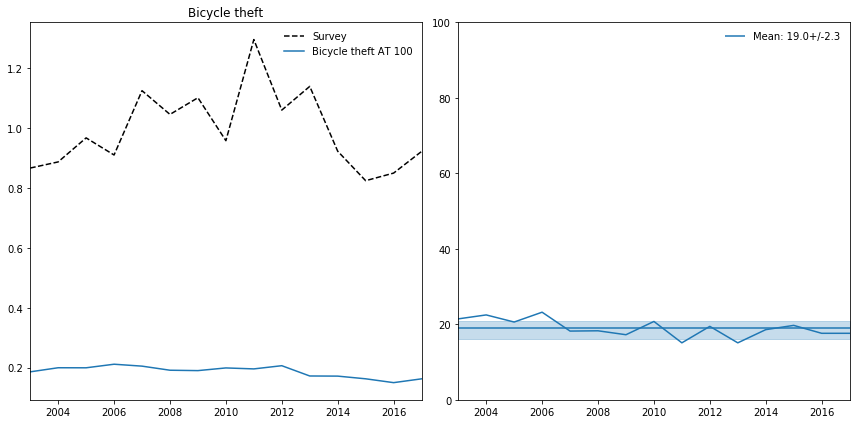

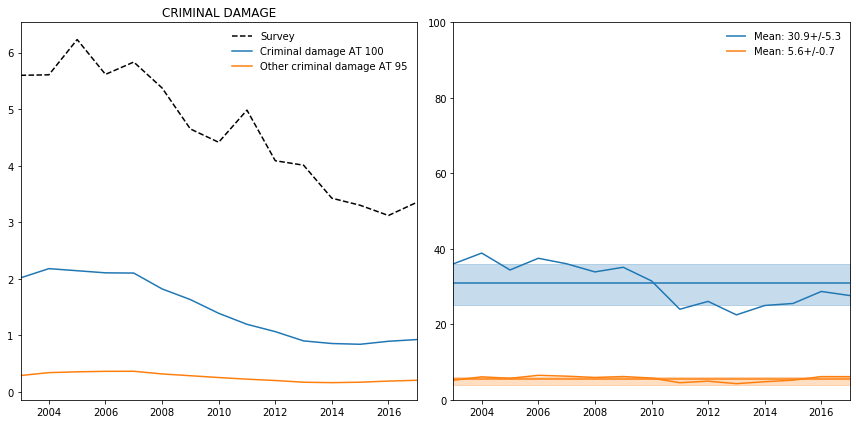

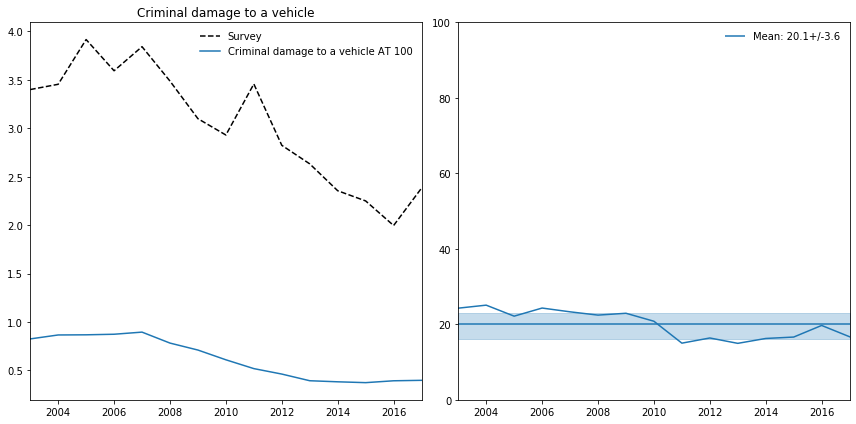

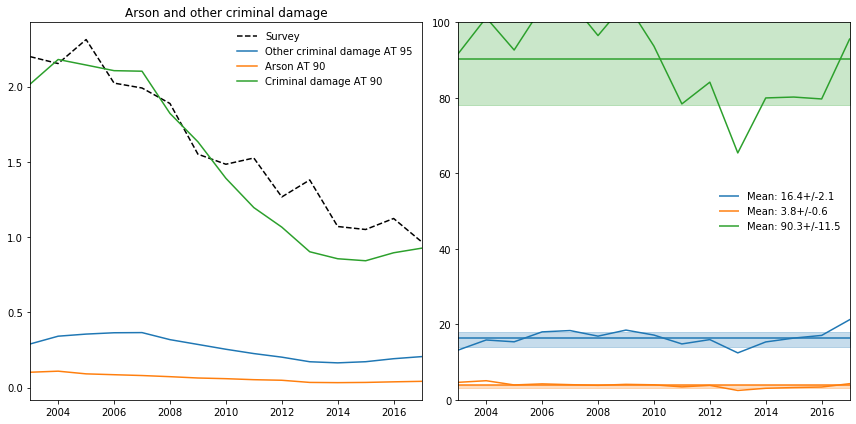

No handles with labels found to put in legend.


list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

Fraud by company director 54 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

Fraud by abuse of position 48 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2



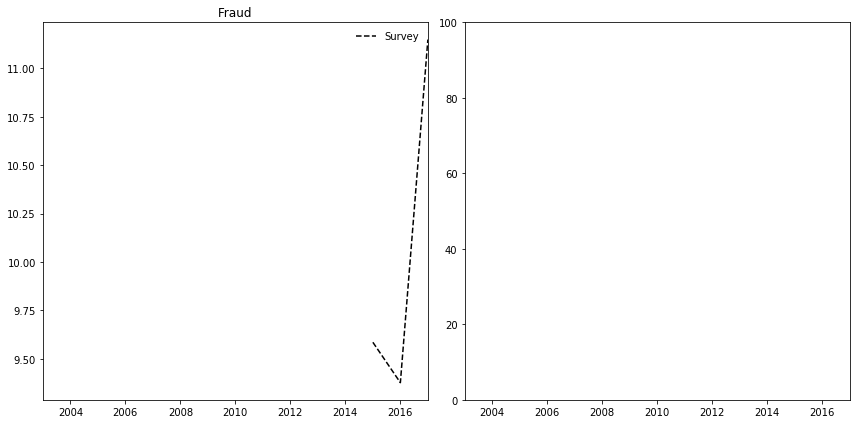

No handles with labels found to put in legend.


list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

TOTAL RECORDED CRIME - ALL OFFENCES EXCLUDING FRAUD AND COMPUTER MISUSE  53 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

TOTAL RECORDED CRIME - ALL OFFENCES EXCLUDING FRAUD AND COMPUTER MISUSE  53 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

Fraud and computer misuse offences recorded by Action fraud  55, 56, 57 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

TOTAL FRAUD  AND COMPUTER MISUSE OFFENCES AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2

TOTAL RECORDED CRIME – ALL OFFENCES INCLUDING FRAUD AND COMPUTER MISUSE53 AT 90 
Failed with exception:
Statistic not avaliable over survey timeframe
3.2



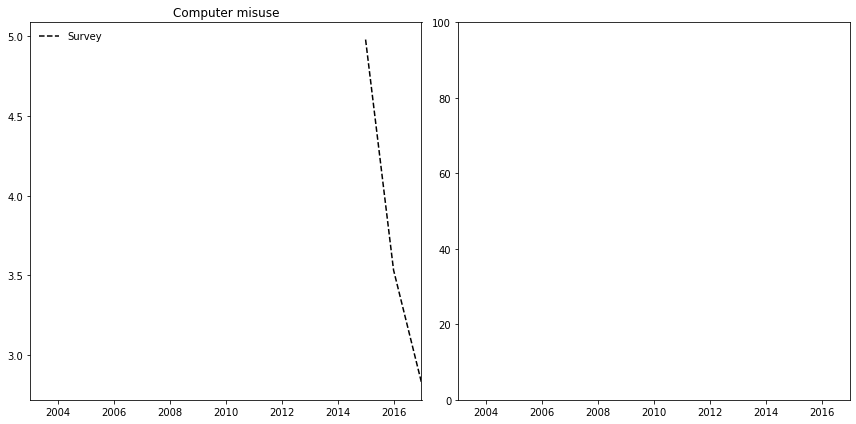

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey

list index out of range
Multiple matches in survey



In [18]:
format_cycle = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']


for matches in higher_order_matches:
    years = np.arange(2003, 2018)
    try:
        survey_frac_index = surveyed_crime.index[matches[0][1]]
        survey_frac = np.array(surveyed_crime.loc[survey_frac_index]) / \
                      np.array(surveyed_crime.loc['Unweighted base - number of adults'].iloc[0])
        
    except Exception as e:
        print(e)
        print("Multiple matches in survey", end = "\n\n")
        continue
    fig, axs = plt.subplots(1,2, figsize=(12, 6))
    axs[0].plot(years, survey_frac[-17:-2]*100, "--", color = 'k', label = "Survey")
    colour_cycler = cycle(format_cycle)
    for match in matches:
        colour = next(colour_cycler)
        my_except = 0
        try:
            
            label = match[0]
            if len(label) > 70:
                words = label.split()
                length = sum(len(word) for word in words)
                new_label = ""
                check = True
                
                for word in words:
                    new_label += word
                    if (len(new_label) > length/2) and check:
                        new_label += " \n"
                        check = False
                    else:
                        new_label += " "
                label = new_label
            my_except+=1 #1
            reported_crime_index = reported_crime.index[match[2]]
            my_except+=1 #2
            reported_frac = np.array(reported_crime.loc[reported_crime_index].iloc[0])[:-5] / \
                            np.array(years_totals[1:])
            my_except += 0.1 # 0.1
            
            report_percentage = (reported_frac/survey_frac[-17:-2])*100
            my_except += 0.1 # 0.2
            ava_report = np.mean(report_percentage)
            std_report = np.std(report_percentage)
            my_except+=1 #3
            assert not np.isnan(ava_report) , "Statistic not avaliable over survey timeframe"
            my_except+=1 #4
            axs[0].plot(years, reported_frac*100, "-", color=colour, label=label)
            my_except+=1 #5
            axs[1].plot(years, report_percentage, color = colour)
            my_except+=1 #6
            axs[1].fill_between(years, 
                                np.full_like(years, ava_report+std_report), 
                                np.full_like(years, ava_report-std_report), 
                                alpha = 0.25, color = colour)
            my_except+=1 #7
            axs[1].hlines(ava_report, 2003, 2019, 
                          'k', color = colour, 
                          label = "Mean: "+str(round(ava_report, 1))+"+/-"+str(round(std_report, 1)))
            my_except+=1 #8
        except Exception as e:
            print(match[0], "\nFailed with exception:")
            print(e)
            print(my_except, end = "\n\n")
            continue
        
    title = surveyed_crime.index[matches[0][1]]
    axs[0].set_xlim(2003, 2017)
    axs[0].legend(frameon=False)
    axs[0].set_title(title)
    axs[1].set_ylim(0,100)
    axs[1].set_xlim(2003, 2017)

    axs[1].legend(frameon=False)
    plt.tight_layout()
    plt.show()
    plt.close()



# Hand coded example

## Victim based crime: Violence with injury

### Report rate 35+/-8%

In [14]:
reported_frac = np.array(reported_crime.loc[('VICTIM BASED CRIME ', '8S', 'Violence with injury')].iloc[0])[:-3] / np.array(years_totals[1:])

survey_frac = np.array(surveyed_crime.loc['Violence with injury']) / np.array(surveyed_crime.loc['Unweighted base - number of adults'].iloc[0])

reported_years = np.arange(2003, 2020)
plt.plot(reported_years, reported_frac*100, label='reported')
survey_years = np.array([1981, 1983, 1987, 1991, 1993, 1995, 1997] + [i for i in range(1999, 2020)])
plt.plot(reported_years, survey_frac[-17:]*100, label='survey')

plt.xlim(2003, 2019)
plt.ylim(0,5)
plt.legend()
plt.show()

report_percentage = (reported_frac/survey_frac[-17:])*100
ava_report = np.mean(report_percentage)
std_report = np.std(report_percentage)
plt.plot(reported_years, report_percentage)
plt.fill_between(reported_years, np.full_like(reported_years, ava_report+std_report), np.full_like(reported_years, ava_report-std_report), alpha = 0.25)
plt.hlines(ava_report, 2003, 2019, 'k')
plt.ylim(0,100)
plt.xlim(2003, 2019)
plt.show()

/Users/pgrylls/anaconda3/envs/AI-CJS/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


ValueError: operands could not be broadcast together with shapes (17,) (15,) 